In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
# Gene heatmap in different clusters

maf_file_path = '/path/maf/file'

df2 = pd.read_csv(maf_file_path,sep=',')
df2

/tmp/ipykernel_6813/3152739471.py:1: DtypeWarning: Columns (87,88,118) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('TCGA_prad_maf.csv',sep=',')


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,GDC_FILTER,COSMIC,MC3_Overlap,GDC_Validation_Status,GDC_Valid_Somatic,vcf_region,vcf_info,vcf_format,vcf_tumor_gt,vcf_normal_gt
0,CCDC158,339965,BI,GRCh38,chr4,76403219,76403219,+,5'UTR,SNP,...,NaN,NaN,False,Unknown,False,chr4:76403219:.:C:T,"ACGTNacgtnMINUS=0,1,0,0,0,0,24,0,2,0;ACGTNacgt...",GT:AD:AF:ALT_F1R2:ALT_F2R1:FOXOG:QSS:REF_F1R2:...,"0/1:44,3:0.067:1:2:0.667:1523,98:20:24","0/0:39,0:0:0:0:.:1276,0:19:20"
1,PCDHA4,56144,BI,GRCh38,chr5,140808044,140808044,+,Missense_Mutation,SNP,...,NaN,COSM1433779;COSM72091,True,Unknown,False,chr5:140808044:.:C:T,"ACGTNacgtnMINUS=0,21,0,1,0,0,16,0,2,0;ACGTNacg...",GT:AD:AF:ALT_F1R2:ALT_F2R1:FOXOG:QSS:REF_F1R2:...,"0/1:94,6:0.045:3:3:0.5:2784,191:54:40","0/0:96,0:0:0:0:.:2701,0:40:56"
2,SLU7,10569,BI,GRCh38,chr5,160407869,160407869,+,Intron,SNP,...,NonExonic;bitgt,NaN,False,Unknown,False,chr5:160407869:.:G:A,"ACGTNacgtnMINUS=4,0,21,0,0,0,0,13,0,0;ACGTNacg...",GT:AD:AF:ALT_F1R2:ALT_F2R1:FOXOG:QSS:REF_F1R2:...,"0/1:69,6:0.068:2:4:0.333:1930,188:36:33","0/0:54,0:0:0:0:.:1476,0:24:30"
3,GOLGA7,51125,BI,GRCh38,chr8,41511759,41511759,+,3'Flank,SNP,...,bitgt,NaN,False,Unknown,False,chr8:41511759:.:C:T,"ACGTNacgtnMINUS=0,4,0,0,0,1,36,0,0,0;ACGTNacgt...",GT:AD:AF:ALT_F1R2:ALT_F2R1:FOXOG:QSS:REF_F1R2:...,"0/1:81,7:0.072:7:0:0:2173,194:39:42","0/0:60,0:0:0:0:.:1512,0:32:28"
4,KCTD19,146212,BI,GRCh38,chr16,67301815,67301815,+,Missense_Mutation,SNP,...,NaN,COSM3672302,True,Unknown,False,chr16:67301815:rs763382763:C:T,"ACGTNacgtnMINUS=0,53,0,1,0,1,98,0,4,0;ACGTNacg...",GT:AD:AF:ALT_F1R2:ALT_F2R1:FOXOG:QSS:REF_F1R2:...,"0/1:269,16:0.042:11:5:0.313:7378,494:112:157","0/0:249,0:0:0:0:.:6501,0:110:139"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35135,GLRA2,2742,BI,GRCh38,chrX,14581254,14581261,+,Frame_Shift_Del,DEL,...,NaN,NaN,True,Unknown,False,chrX:14581253:.:ATGACTCCC:A,ECNT=1;HCNT=2;MAX_ED=.;MIN_ED=.;NLOD=20.77;TLO...,GT:AD:AF:ALT_F1R2:ALT_F2R1:QSS:REF_F1R2:REF_F2R1,"0/1:36,26:0.426:17:9:1082,768:20:16","0/0:78,0:0:0:0:2375,0:49:29"
35136,PHKA2,5256,BI,GRCh38,chrX,18894338,18894338,+,Missense_Mutation,SNP,...,NaN,COSM371211,True,Unknown,False,chrX:18894338:rs754449318:C:T,"ACGTNacgtnMINUS=0,5,0,2,0,0,6,0,1,0;ACGTNacgtn...",GT:AD:AF:ALT_F1R2:ALT_F2R1:FOXOG:QSS:REF_F1R2:...,"0/1:41,4:0.086:0:4:1:1073,133:29:12","0/0:42,0:0:0:0:.:1236,0:21:21"
35137,CYBB,1536,BI,GRCh38,chrX,37782121,37782121,+,Missense_Mutation,SNP,...,NaN,NaN,True,Unknown,False,chrX:37782121:.:G:C,"ACGTNacgtnMINUS=0,2,12,0,0,0,1,6,0,0;ACGTNacgt...",GT:AD:AF:ALT_F1R2:ALT_F2R1:FOXOG:QSS:REF_F1R2:...,"0/1:46,5:0.091:1:4:0.2:1449,170:26:20","0/0:55,0:0:0:0:.:1818,0:22:33"
35138,AWAT1,158833,BI,GRCh38,chrX,70238212,70238212,+,Missense_Mutation,SNP,...,NaN,NaN,True,Unknown,False,chrX:70238212:.:G:T,"ACGTNacgtnMINUS=0,0,9,1,0,0,0,1,2,0;ACGTNacgtn...",GT:AD:AF:ALT_F1R2:ALT_F2R1:FOXOG:QSS:REF_F1R2:...,"0/1:27,5:0.179:2:3:0.4:863,162:17:10","0/0:42,0:0:0:0:.:1389,0:28:14"


In [3]:
dfMAF = df2[['Hugo_Symbol','Tumor_Sample_Barcode']]
dfMAF

,Hugo_Symbol,Tumor_Sample_Barcode
0,CCDC158,TCGA-G9-6353-01A-11D-1961-08
1,PCDHA4,TCGA-G9-6353-01A-11D-1961-08
2,SLU7,TCGA-G9-6353-01A-11D-1961-08
3,GOLGA7,TCGA-G9-6353-01A-11D-1961-08
4,KCTD19,TCGA-G9-6353-01A-11D-1961-08
...,...,...
35135,GLRA2,TCGA-V1-A9OH-01A-11D-A41K-08
35136,PHKA2,TCGA-V1-A9OH-01A-11D-A41K-08
35137,CYBB,TCGA-V1-A9OH-01A-11D-A41K-08
35138,AWAT1,TCGA-V1-A9OH-01A-11D-A41K-08


In [4]:
genes_all = ["MEF2C","MAPK1","STAT3","ATM","ZNF263","ITGAM","ESR1","GNAI1","PIK3R1","FOXA1","GNB1","SMAD4","C3","FAM20A","FAM20C","KRAS","GNAL","SP3","ACTG1","CTNNB1","PTK2","RHOC","ACTB","CDC42","CTNNA1","H4C1","ITGB1","JUN","JUND","RAC1","RELA","RHOA","YY1","SRF","AKT1","CALM3","CREB1","CREBBP","EGFR","EP300","GNAI2","GNAI3","HIF1A","MAPK3","NFKB1","PIK3CA","PIK3CB","PLCG2","PRKACA","RHOB","RXRA","RXRG","SRC","STAT1","TP53","AR","EGR1","GNG2","HRAS","MYC","PRKACB","PRKACG","SP1","TCF4","ARRB1","ARRB2","GRK2","GRK3","RPS27A","UBA52","UBB","UBC","E2F1","FYN","GNAQ","HDAC2","FOS","TAF1","CEBPB","CTCF","PRKCB","RAD21","SPI1","SREBF1","TCF12","REST","STAT2","SUZ12","TFAP2A","CTBP2","PAX5","USF1","GABPA","GNG13","GNG7"]
genes2 = ["ACTG1","CTNNB1","PTK2","RHOC"]
genes4 = ["MEF2C","MAPK1","STAT3","ATM","ZNF263"]
genes3 = ["ITGAM","ESR1","GNAI1","PIK3R1","FOXA1","GNB1","SMAD4","C3","FAM20A","FAM20C","KRAS","GNAL","SP3"]
genes1 = ["ACTB","CDC42","CTNNA1","H4C1","ITGB1","JUN","JUND","RAC1","RELA","RHOA","YY1","SRF","AKT1","CALM3","CREB1","CREBBP","EGFR","EP300","GNAI2","GNAI3","HIF1A","MAPK3","NFKB1","PIK3CA","PIK3CB","PLCG2","PRKACA","RHOB","RXRA","RXRG","SRC","STAT1","TP53","AR","EGR1","GNG2","HRAS","MYC","PRKACB","PRKACG","SP1","TCF4","ARRB1","ARRB2","GRK2","GRK3","RPS27A","UBA52","UBB","UBC","E2F1","FYN","GNAQ","HDAC2","FOS","TAF1","CEBPB","CTCF","PRKCB","RAD21","SPI1","SREBF1","TCF12","REST","STAT2","SUZ12","TFAP2A","CTBP2","PAX5","USF1","GABPA","GNG13","GNG7"]

In [5]:
dfMAF_clust1 = dfMAF[dfMAF["Hugo_Symbol"].isin(genes1)]
dfMAF_clust2 = dfMAF[dfMAF["Hugo_Symbol"].isin(genes2)]
dfMAF_clust3 = dfMAF[dfMAF["Hugo_Symbol"].isin(genes3)]
dfMAF_clust4 = dfMAF[dfMAF["Hugo_Symbol"].isin(genes4)]
dfMAF_all = dfMAF[dfMAF["Hugo_Symbol"].isin(genes_all)]

In [6]:
patients1 = list(pd.unique(dfMAF_clust1["Tumor_Sample_Barcode"]))
patients2 = list(pd.unique(dfMAF_clust2["Tumor_Sample_Barcode"]))
patients3 = list(pd.unique(dfMAF_clust3["Tumor_Sample_Barcode"]))
patients4 = list(pd.unique(dfMAF_clust4["Tumor_Sample_Barcode"]))
patients_all = list(pd.unique(dfMAF_all["Tumor_Sample_Barcode"]))

In [7]:
def heatmap(data, row_labels, col_labels, plot_title, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}
    
    
    # Plot the heatmap
    im = ax.imshow(data, aspect='auto', **kwargs)

    # Create colorbar
    #cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    #cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    #ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels, size = 10)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    plt.title(plot_title)
    plt.xlabel("Patient")
    plt.ylabel("Gene mutation")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    #ax.grid(which="minor", color="w", linestyle='-', linewidth=0.5)
    #ax.tick_params(which="minor", bottom=False, left=False)

    return im

In [8]:
def data_matrix(genes,patients,name_figure,plot_title,width,height,remove_genes_with_no_mut):
    shape = (len(genes),len(patients))
    data_plot = np.empty(shape, dtype=float)
    for g in range(len(genes)):
        for p in range(len(patients)):
                if len(dfMAF.loc[(dfMAF['Hugo_Symbol'] == genes[g]) & (dfMAF["Tumor_Sample_Barcode"] == patients[p])]) == 0:
                    data_plot[g,p] = 0
                else:
                    data_plot[g,p] = 1
    
    gene_count = np.zeros(shape=(1,len(genes)))
    
    print(data_plot)
    
    for g in range(len(genes)):
        for p in range(len(patients)):
            if data_plot[g,p] == 1:
                gene_count[0,g] = gene_count[0,g] + 1
                
    gene_count_list = []
    
    for i in range(len(genes)):
        gene_count_list.append(gene_count[0,i])
    
    print(gene_count_list)
    
    i = 0
    m = 0
    genes_sorted = []
    genes_with_no_mut = 0
    while 1:
        m = max(gene_count_list)
        i = gene_count_list.index(m)        
        if m > -1:
            genes_sorted.append(i)
            gene_count_list[i] = -1
            if m == 0:
                genes_with_no_mut += 1
        else:
            break
    
    gene_name_sorted = []
    for i in range(len(genes)):
        gene_name_sorted.append(genes[genes_sorted[i]])
    
    print(genes_sorted)
    print(gene_name_sorted)
    
    if remove_genes_with_no_mut == 1:
        gene_name_sorted = gene_name_sorted[0:(len(genes)-genes_with_no_mut)]
    
    data_plot2 = np.empty((len(gene_name_sorted),len(patients)), dtype=float)
    for g in range(len(gene_name_sorted)):
        for p in range(len(patients)):
                if len(dfMAF.loc[(dfMAF['Hugo_Symbol'] == gene_name_sorted[g]) & (dfMAF["Tumor_Sample_Barcode"] == patients[p])]) == 0:
                    data_plot2[g,p] = 0
                else:
                    data_plot2[g,p] = 1
    
    
    pat = []
    for g in range(len(gene_name_sorted)):
        for p in range(len(patients)):
            if data_plot2[g,p] == 1 and p not in pat:
                pat.append(p)
                
    print(pat)
    
    data_plot_sorted = np.empty((len(gene_name_sorted),len(patients)), dtype=float)
    
    j = 0
    for i in pat:
        data_plot_sorted[:,j] = data_plot2[:,i]    
        j=j+1
        
    fig, ax = plt.subplots()
    fig.set_size_inches(width,height)
    
    im = heatmap(data_plot_sorted,gene_name_sorted,patients,plot_title,ax=ax,
                   cmap="YlGn", cbarlabel="Mutation")

    #fig.tight_layout()
    plt.savefig(name_figure)
    plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 2.0, 5.0, 2.0, 0.0, 1.0, 4.0, 1.0, 1.0, 5.0, 7.0, 10.0, 3.0, 1.0, 2.0, 0.0, 1.0, 12.0, 5.0, 6.0, 3.0, 1.0, 1.0, 4.0, 0.0, 6.0, 51.0, 2.0, 2.0, 0.0, 5.0, 2.0, 1.0, 2.0, 3.0, 3.0, 1.0, 2.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 3.0, 0.0, 1.0, 0.0, 4.0, 0.0, 3.0, 7.0, 4.0, 1.0, 0.0, 3.0, 1.0, 1.0, 1.0, 0.0, 0.0, 3.0, 1.0, 2.0, 1.0, 0.0]
[32, 23, 17, 16, 58, 25, 31, 8, 15, 24, 36, 12, 29, 55, 59, 18, 26, 40, 41, 51, 57, 62, 68, 0, 6, 7, 9, 20, 33, 34, 37, 39, 43, 70, 2, 11, 13, 14, 19, 22, 27, 28, 38, 42, 46, 49, 50, 53, 60, 63, 64, 65, 69, 71, 1, 3, 4, 5, 10, 21, 30, 35, 44, 45, 47, 48, 52, 54, 56, 61, 66, 67, 72]
['TP53', 'PIK3CA', 'EP300', 'EGFR', 'PRKCB', 'PLCG2', 'STAT1', 'RELA', 'CREBBP', 'PIK3CB', 'HRAS', 'AKT1', 'RXRG', 'TAF1', 'RAD21', 'GNAI2', 'PRKACA', 'SP1', 'TCF4', 'FYN', 'CTCF', 'TCF12', 'P

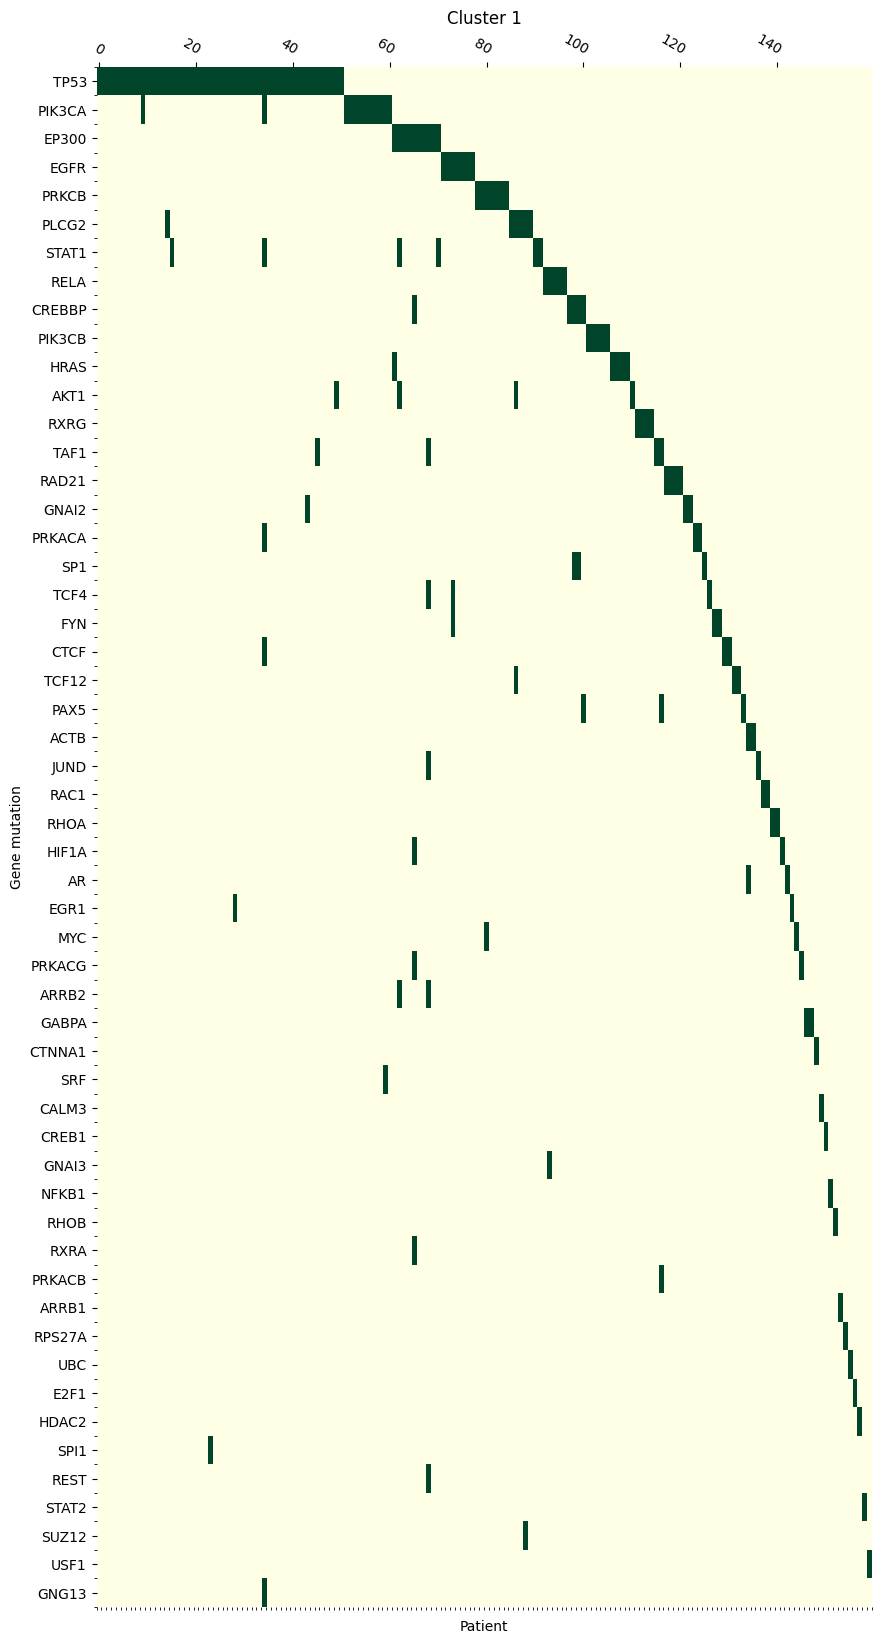

In [9]:
data_matrix(genes1,patients1,"PlotCluster1.png","Cluster 1",10,20,1)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3.0, 11.0, 4.0, 2.0]
[1, 2, 0, 3]
['CTNNB1', 'PTK2', 'ACTG1', 'RHOC']
[0, 1, 4, 6, 8, 11, 12, 13, 15, 17, 18, 2, 7, 9, 14, 3, 10, 16, 5]


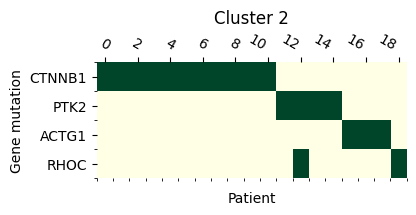

In [40]:
data_matrix(genes2,patients2,"PlotCluster2.png","Cluster 2",4,1.5,1)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0.
  1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0.
  1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 

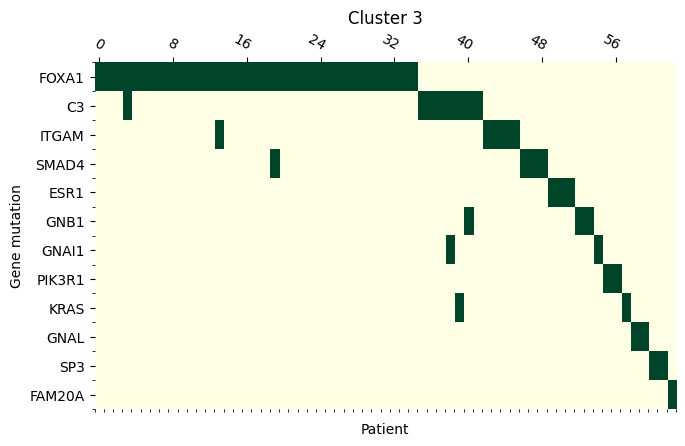

In [11]:
data_matrix(genes3,patients3,"PlotCluster3.png","Cluster 3",7.5,4.5,1)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0.
  1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[2.0, 1.0, 5.0, 21.0, 1.0]
[3, 2, 0, 1, 4]
['ATM', 'STAT3', 'MEF2C', 'MAPK1', 'ZNF263']
[1, 2, 4, 5, 7, 8, 9, 11, 13, 14, 15, 16, 20, 21, 22, 24, 25, 26, 27, 28, 29, 0, 6, 10, 12, 17, 3, 23, 19, 18]


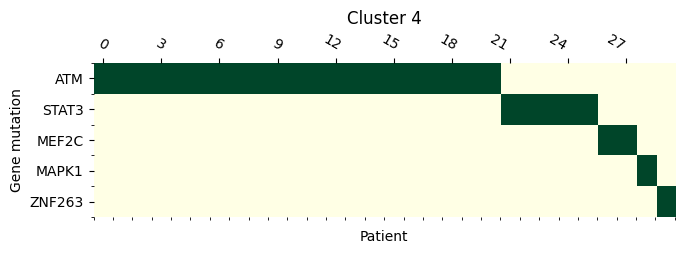

In [12]:
data_matrix(genes4,patients4,"PlotCluster4.png","Cluster 4",7.5,2,1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[2.0, 1.0, 5.0, 21.0, 1.0, 5.0, 3.0, 2.0, 2.0, 35.0, 3.0, 4.0, 8.0, 1.0, 0.0, 2.0, 2.0, 2.0, 3.0, 11.0, 4.0, 2.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 2.0, 5.0, 2.0, 0.0, 1.0, 4.0, 1.0, 1.0, 5.0, 7.0, 10.0, 3.0, 1.0, 2.0, 0.0, 1.0, 12.0, 5.0, 6.0, 3.0, 1.0, 1.0, 4.0, 0.0, 6.0, 51.0, 2.0, 2.0, 0.0, 5.0, 2.0, 1.0, 2.0, 3.0, 3.0, 1.0, 2.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 3.0, 0.0, 1.0, 0.0, 4.0, 0.0, 3.0, 7.0, 4.0, 1.0, 0.0, 3.0, 1.0, 1.0, 1.0, 0.0, 0.0, 3.0, 1.0, 2.0, 1.0, 0.0]
[54, 9, 3, 45, 19, 39, 12, 38, 80, 47, 53, 2, 5, 30, 37, 46, 58, 11, 20, 34, 51, 77, 81, 6, 10, 18, 40, 48, 62, 63, 73, 79, 84, 90, 0, 7, 8, 15, 16, 17, 21, 22, 28, 29, 31, 42, 55, 56, 59, 61, 65, 92, 1, 4, 13, 24, 33, 35, 36, 41, 44, 49, 50, 60, 64, 68, 71, 72, 75, 82, 85, 86, 87, 91, 93, 14, 23, 25, 26, 27, 32, 43, 52, 57, 66, 67, 69, 70, 74, 76, 78, 83, 88,

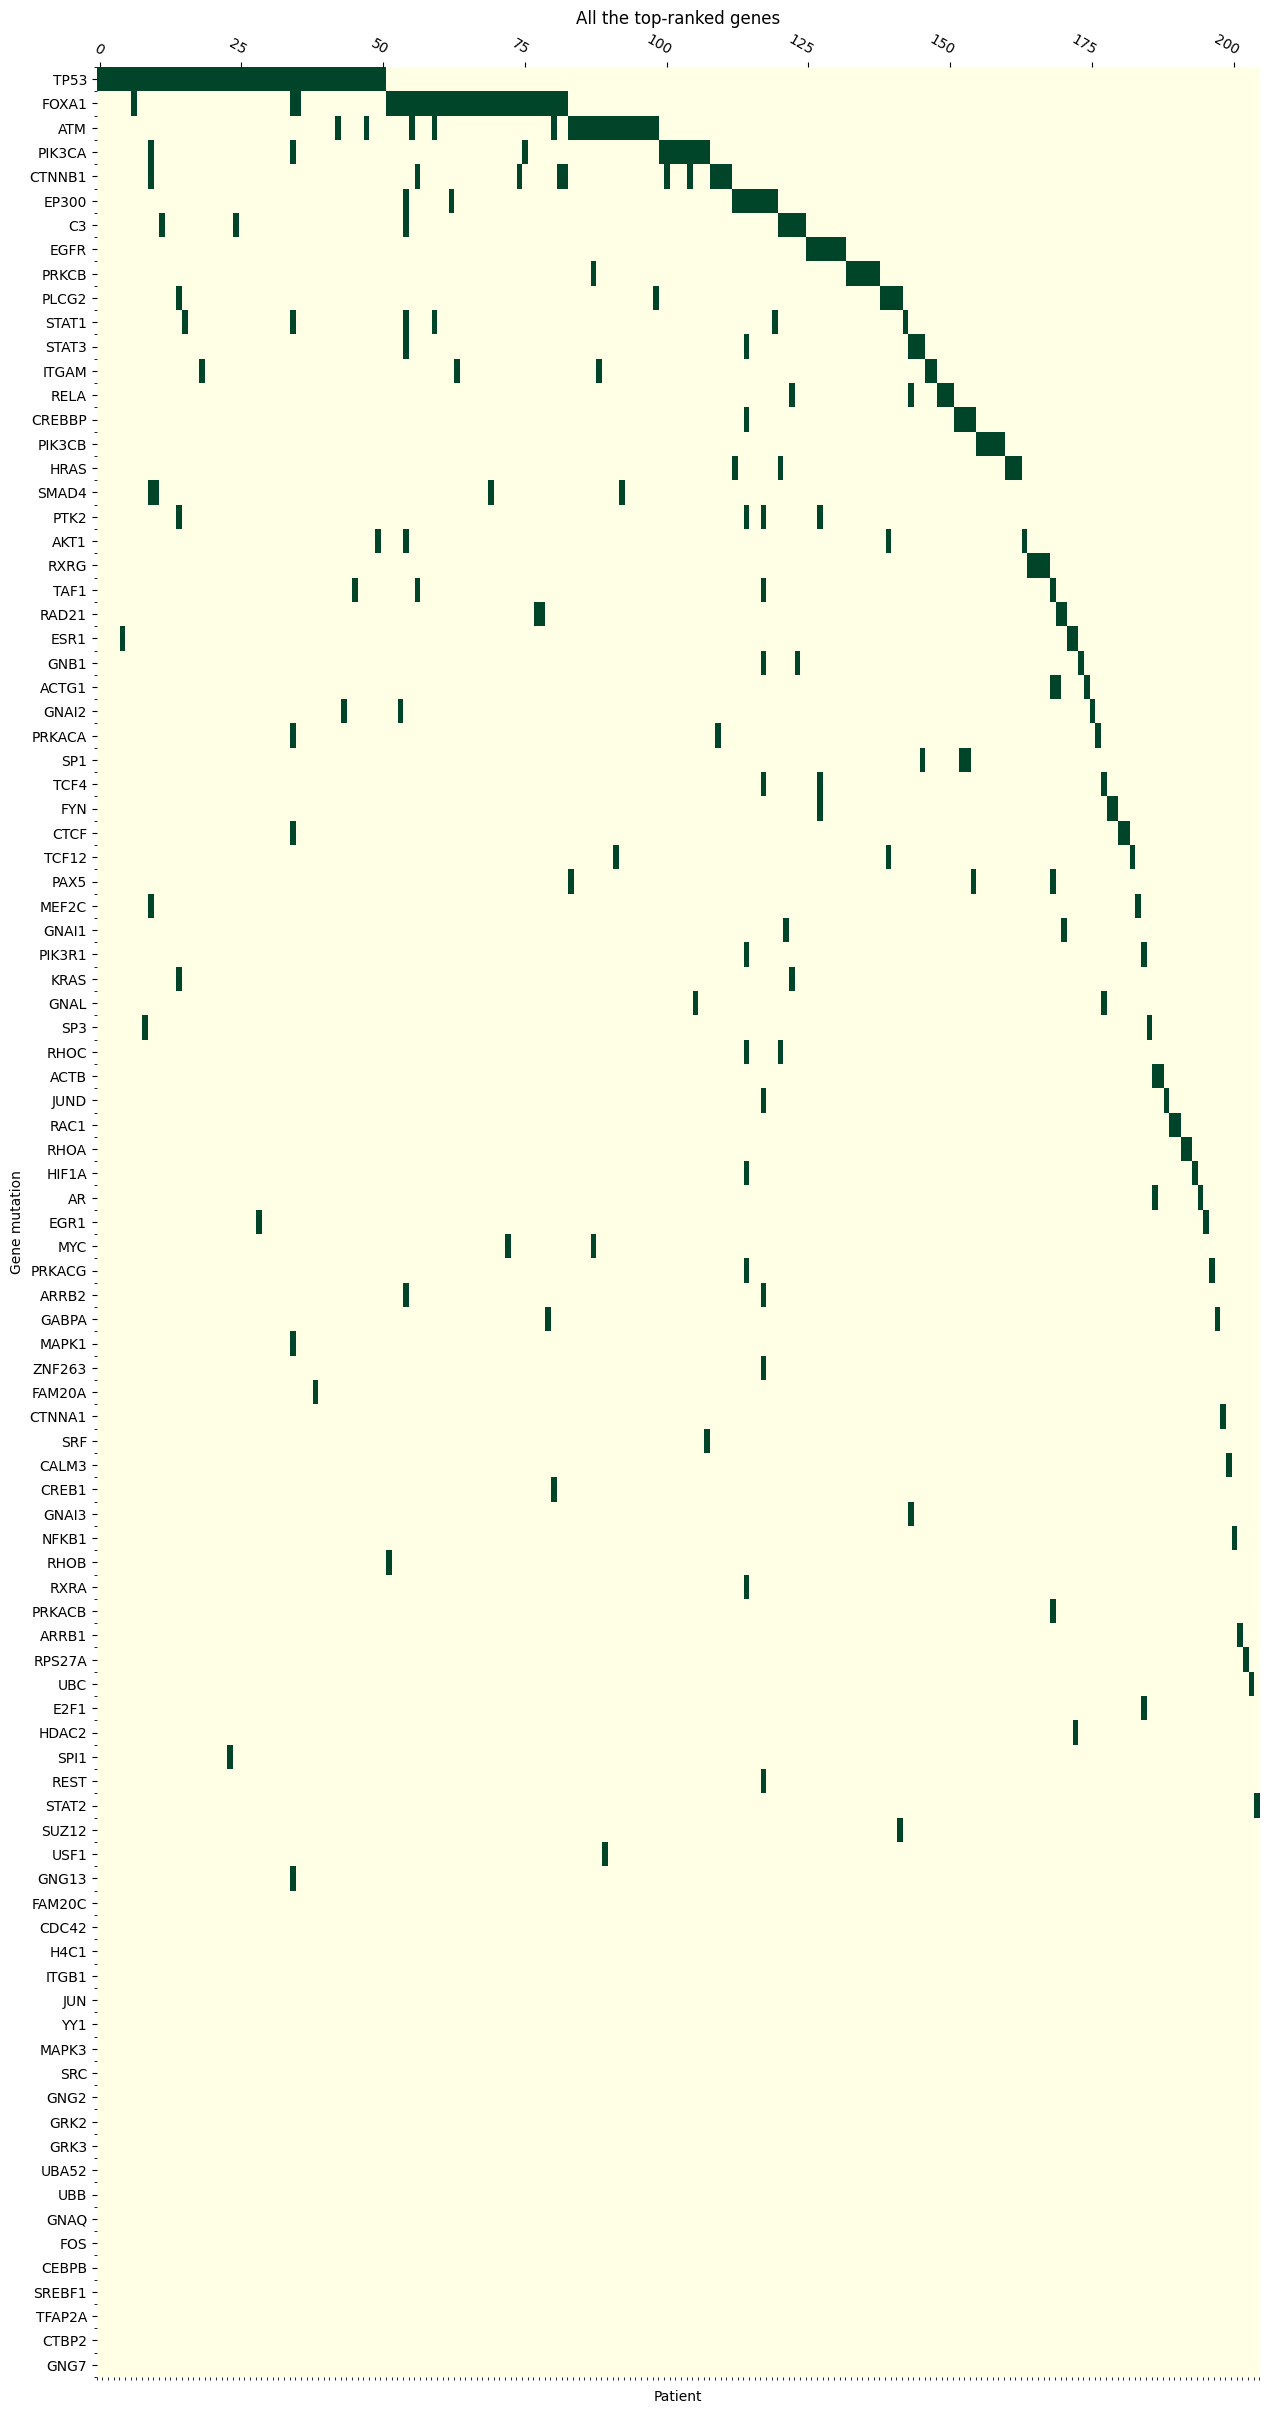

In [13]:
data_matrix(genes_all,patients_all,"Plot_all_genes.png","All the top-ranked genes",15,30,0)